# Image classification

## Import packages

Let's start by importing the required packages. The `os` package is used to read files and directory structure, NumPy is used to convert python list to numpy array and to perform required matrix operations and `matplotlib.pyplot` to plot the graph and display images in the training and validation data.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

Import Tensorflow and the Keras classes needed to construct our model.

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [11]:

PATH = os.path.join("C:\\Users\\Trivikram\\.keras\\datasets", 'Softdrinks')

After extracting its contents, assign variables with the proper file path for the training and validation set.

In [12]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir=os.path.join(PATH,'test')

In [14]:
train_coke_can_dir = os.path.join(train_dir, 'coke_can')  # directory with our training coke can pictures
train_coke_bottle_dir = os.path.join(train_dir, 'coke_bottle')  # directory with our training coke bottle pictures
train_fanta_dir = os.path.join(train_dir, 'fanta')  # directory with our training fanta pictures
train_sprite_dir = os.path.join(train_dir, 'sprite')  # directory with our training sprite pictures

validation_coke_can_dir = os.path.join(validation_dir, 'coke_can')  # directory with our validation coke can pictures
validation_coke_bottle_dir = os.path.join(validation_dir, 'coke_bottle')  # directory with our validation coke bottle pictures
validation_fanta_dir = os.path.join(validation_dir, 'fanta')  # directory with our validation fanta pictures
validation_sprite_dir = os.path.join(validation_dir, 'sprite')  # directory with our validation sprite pictures


### Understand the data

Let's look at how many coke can,coke bottle,fanta and sprite  images are in the training and validation directory:

In [15]:
num_coke_can_tr = len(os.listdir(train_coke_can_dir))
num_coke_bottle_tr = len(os.listdir(train_coke_bottle_dir))
num_fanta_tr=len(os.listdir(train_fanta_dir))
num_sprite_tr=len(os.listdir(train_sprite_dir))

num_coke_can_val = len(os.listdir(validation_coke_can_dir))
num_coke_bottle_val = len(os.listdir(validation_coke_bottle_dir))
num_fanta_val = len(os.listdir(validation_fanta_dir))
num_sprite_val = len(os.listdir(validation_sprite_dir))

total_train = num_coke_can_tr + num_coke_bottle_tr+num_fanta_tr+num_sprite_tr
total_val = num_coke_can_val + num_coke_bottle_val+num_fanta_val+num_sprite_val

In [16]:
print('total training coke can images:',num_coke_can_tr)
print('total training coke bottle images:', num_coke_bottle_tr)
print('total training fanta images:',num_fanta_tr)
print('total training sprite images:', num_sprite_tr)

print('total validation coke can images:', num_coke_can_val)
print('total validation coke bottle images:', num_coke_bottle_val)
print('total validation fanta can images:', num_fanta_val)
print('total validation sprite images:', num_sprite_val)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training coke can images: 96
total training coke bottle images: 96
total training fanta images: 96
total training sprite images: 96
total validation coke can images: 51
total validation coke bottle images: 51
total validation fanta can images: 51
total validation sprite images: 51
--
Total training images: 384
Total validation images: 204


For convenience, set up variables to use while pre-processing the dataset and training the network.

In [17]:
batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Data preparation

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the `ImageDataGenerator` class provided by `tf.keras`. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [18]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255)

After defining the generators for training and validation images, the `flow_from_directory` method load images from the disk, applies rescaling, and resizes the images into the required dimensions.

In [19]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode="categorical")

Found 384 images belonging to 4 classes.


In [20]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                              class_mode="categorical")

Found 204 images belonging to 4 classes.


## Create the model

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it that is activated by a `relu` activation function. The model outputs class probabilities based on binary classification by the `sigmoid` activation function.

In [15]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Compile the model

For this tutorial, choose the *ADAM* optimizer and *binary cross entropy* loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument.

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

### Model summary

View all the layers of the network using the model's `summary` method:

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

### Train the model

Use the `fit_generator` method of the `ImageDataGenerator` class to train the network.

In [18]:
history = model.fit_generator(train_data_gen,
            steps_per_epoch=total_train // batch_size,
            epochs=epochs,
            validation_data=val_data_gen,
            validation_steps=total_val // batch_size)

Epoch 1/10
3/3 [==============================] - 52s 17s/step - loss: 2.1518 - categorical_accuracy: 0.2188 - val_loss: 1.5859 - val_categorical_accuracy: 0.2344
Epoch 2/10
3/3 [==============================] - 30s 10s/step - loss: 1.4491 - categorical_accuracy: 0.3125 - val_loss: 1.3643 - val_categorical_accuracy: 0.4609
Epoch 3/10
3/3 [==============================] - 30s 10s/step - loss: 1.3204 - categorical_accuracy: 0.6406 - val_loss: 1.2808 - val_categorical_accuracy: 0.4375
Epoch 4/10
3/3 [==============================] - 30s 10s/step - loss: 1.2130 - categorical_accuracy: 0.6901 - val_loss: 1.1476 - val_categorical_accuracy: 0.7422
Epoch 5/10
3/3 [==============================] - 29s 10s/step - loss: 1.0365 - categorical_accuracy: 0.6693 - val_loss: 0.9949 - val_categorical_accuracy: 0.8359
Epoch 6/10
3/3 [==============================] - 30s 10s/step - loss: 0.7767 - categorical_accuracy: 0.9141 - val_loss: 0.7710 - val_categorical_accuracy: 0.8828
Epoch 7/10
3/3 [======

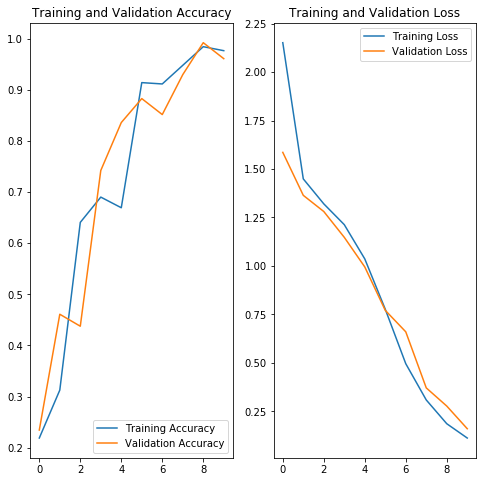

In [19]:

model.save('Classifier.h5')
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [4]:
model=tf.keras.models.load_model('Classifier.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
